<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe13-TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del vendedor viajero (TSP)

**Entrada**: Un grafo completo no dirigido $G=(V,E)$ y un valor $c_e$ para cada arco $e\in E$.

**Salida**: Un ciclo que pase por todos los vértices del grafo solo una vez con el coste mínimo, es decir, que minimice $\sum\limits_{e\in T}c_e$

El **TSP** (travelling salesman problem), o problema del vendedor viajero, consiste en determinar la ruta más corta pasando por todos los vértices de un grafo solo una vez y volviendo al vértice de origen. El siguiente ejemplo muestra una instancia del TSP, en donde los arcos sombreados forman el tour con el coste mínimo:

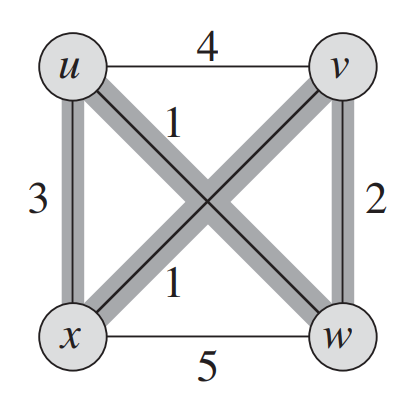

El TSP es un problema **NP-hard**. Esto se puede demostrar fácilmente aplicando reducción al problema del **ciclo hamiltoniano**, pues ambos problemas tratan de encontrar un ciclo que pase por todos los nodos del grafo. Por otro lado, al ser un problema NP-hard, es poco probable encontrar una solución en tiempo polinomial. Es por ello que se han inventado algoritmos que resuelven este problema de manera aproximada, entregando una solución en un tiempo razonable.

La cantidad total de rutas en un grafo completo es $(n-1)!/2$. Es decir, encontrar el tour más corto mediante un método de fuerza bruta que verifique cada uno de los caminos posibles tomaría un tiempo $O(n!)$, lo cual es bastante ineficiente. Por esta razón, se prefiere trabajar con algoritmos aproximados que entregan una solución inexacta al problema en tiempo polinomial.

# 2. Algoritmos para el TSP

## 2.1 Código

### Generador de instancias

In [3]:
import numpy as np

def dist(c1, c2):
   return np.sqrt( (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 )    

def generate_tsp_instance(n: int):
    """
        Input: cantidad de vértices.
        Output: una matriz de n x n. Cada posición M[i][j] dentro de la matriz indica la distancia que existe entre el vértice i y el vértice j.
    """
    cities = []
    for i in range(n):
        x, y = np.random.uniform(-100, 100), np.random.uniform(-100, 100)
        cities.append([x, y])
        
    instance = []
    for i, coord1 in enumerate(cities):
        instance.append([])
        for j, coord2 in enumerate(cities):
            if i != j:
                instance[i].append(dist(coord1, coord2))
            else:
                instance[i].append(0)
          
    return instance

### Algoritmo de búsqueda local

In [4]:
from termcolor import colored
import random

def tsp_local_search(G, verbose=False):

  # Calcula el costo del tour actual
  def calculate_cost():
    cost = 0
    for i in range(n):
      cost += G[path[i]][path[i+1]]
    return cost

  n = len(G) # Cantidad de vértices

  # Generamos una solución aleatoria
  path = list(range(n))
  random.shuffle(path)
  path.append(path[0])

  if verbose:
    cost = calculate_cost()
    print(f"Solución inicial: {path}")
    print(f"Costo inicial: {cost}\n")

  while True:
    max_change = 0 # Decrecimiento máximo
    max_i = 0
    max_j = 0

    for i in range(n-2):
      for j in range(i+2, n-1):
        current = G[path[i]][path[i+1]] + G[path[j]][path[j+1]] # Costo actual
        new = G[path[i]][path[j]] + G[path[i+1]][path[j+1]] # Costo nuevo

        change = current - new # Calculamos el decrecimiento del costo

        if change > max_change:
          max_change = change # Actualizamos el decrecimiento máximo
          max_i = i # Guardamos los vértices para realizar el intercambio
          max_j = j
          
    # Dejamos de iterar cuando la solución no pueda mejorarse
    if max_change == 0: break

    # Realizamos el intercambio de vértices
    path[max_i+1:max_j+1] = path[max_i+1:max_j+1][::-1]

    if verbose:
      print(f"Intercambiando arcos ", end='')
      print(colored(f"({path[max_i]}, {path[max_j]})", 'red'), end='')
      print(f" y ", end='')
      print(colored(f"({path[max_i+1]}, {path[max_j+1]})", 'red'), end='')

      print(f" por ", end='')
      print(colored(f"({path[max_i]}, {path[max_i+1]})", 'green'), end='')
      print(f" y ", end='')
      print(colored(f"({path[max_j]}, {path[max_j+1]})", 'green'))

      print("Solución actual: ", end='')
      print(str(path[:max_i])[:-1], end='')
      if max_i != 0: print(", ", end='')
      print(f"{colored(str(path[max_i:max_i+2])[1:-1], 'magenta')}, ", end='')
      if max_i + 2 != max_j: 
        print(f"{str(path[max_i+2:max_j])[1:-1]}, ", end='')
      print(colored(str(path[max_j:max_j+2])[1:-1], 'blue'), end='')
      print(f", {str(path[max_j+2:])[1:]}")

      cost = cost - max_change
      print(f"Decrecimiento: {max_change}")
      print(f"Costo actual: {cost}\n")

  cost = calculate_cost() # Calculamos el costo del tour obtenido

  if verbose:
    print(f"Solución final: {path}")
    print(f"Costo final: {cost}")

  return path, cost

In [5]:
graph = generate_tsp_instance(10)
path, cost = tsp_local_search(graph)
print(f"Tour: {path}")
print(f"Costo: {cost}")

Tour: [8, 5, 4, 9, 3, 1, 2, 0, 7, 6, 8]
Costo: 726.9659929489472


### Algoritmo Greedy

In [6]:
from math import inf

def tsp_greedy(G, verbose=False):

  # Calcula el costo del tour actual
  def calculate_cost():
    cost = 0
    for i in range(n):
      cost += G[path[i]][path[i+1]]
    return cost

  n = len(G) # Cantidad de vértices
  path = list()
  visited = dict()

  for i in range(n):
    visited[i] = False

  s = 0 # Vértice inicial
  path.append(s) # Se agrega el vértice inicial al camino
  visited[s] = True # Marcamos el vértice inicial como visitado

  if verbose:
    print("Comenzando tour desde el nodo 0")
    print(f"Camino actual: {path}\n")

  for i in range(n-1):
    min = inf # Costo del vértice más cercano

    for j in range(n):     
      # Recorremos el resto de vértices no visitados
      if not visited[j] and s != j:
        cost = G[s][j] # Calculamos la distancia

        if cost < min:
          min = cost # Actualizamos la distancia mínima
          nearest = j # Actualizamos el vértice más cercano

        if verbose:
          print(f"Distancia de {s} a {j} = {cost}")

    path.append(nearest) # Añadimos el vértice más cercano al camino
    visited[nearest] = True # Marcamos el vértice como visitado
    s = nearest # Avanzamos a este vértice y seguimos iterando

    if verbose:
      print(f"\nEligiendo {colored(nearest, 'blue')} ", end='')
      print(f"como el nodo más cercano")
      print(f"Marcando {nearest} como visitado")
      print(f"Camino actual: {path}\n")

  path.append(path[0]) # Finalizamos el tour volviendo al nodo inicial
  cost = calculate_cost() # Calculamos el costo del tour obtenido

  if verbose:
    print(f"Volviendo al nodo de origen {path[0]}")
    print(f"Solución final: {path}")
    print(f"Costo final: {cost}")

  return path, cost

In [7]:
graph = generate_tsp_instance(10)
path, cost = tsp_greedy(graph)
print(f"Tour: {path}")
print(f"Costo: {cost}")

Tour: [0, 6, 2, 7, 3, 8, 5, 9, 1, 4, 0]
Costo: 547.3913917798677


## 2.2 Descripción del algoritmo

La entrada consiste en un grafo completo $G$ con $n$ vértices, donde cada arco posee un peso $c_e$ asociado. El algoritmo retorna un arreglo con el orden en que deben ser visitados los nodos para completar el tour, más el costo correspondiente a este camino. Los pasos de cada algoritmo se describen a continuación:

### Búsqueda local

1. Generamos una solución completamente aleatoria.

2. Mientras la solución sea mejorable, realizamos la operación 2-change. La solución dejará de ser mejorable cuando el decrecimiento máximo se mantenga en 0. Si esto ocurre, dejamos de iterar.

4. Calculamos el costo del tour resultante.

5. Retornamos el tour más su costo asociado.

Los pasos de la operación 2-change son los siguientes:

1. Inicializamos el decrecimiento máximo en 0.

2. Calculamos el costo del tour intercambiando dos arcos del grafo por otros dos arcos (sin realizar el intercambio como tal).

3. Calculamos la variación del costo del tour con la fórmula **$\text{costo actual} - \text{costo nuevo}$**

4. Si la variación es mayor al decrecimiento máximo actual, actualizamos este último valor con la variación obtenida.

5. Una vez hayamos calculado el costo para cada posible intercambio, habremos obtenido el decrecimiento máximo que se puede conseguir con esta operación.

6. Finalmente efectuamos el intercambio que maximiza el decrecimiento y repetimos el proceso.

### Greedy

1. Iniciamos el tour desde un vértice arbitrario.

2. Avanzamos al vértice no visitado más cercano al vértice actual y lo marcamos como visitado.

3. Repetimos este paso hasta que todos los vértices sean visitados.

4. Calculamos el costo del tour resultante.

5. Retornamos el tour más su costo asociado.

## 2.3 Ejemplo

### Búsqueda local

Consideremos el siguiente grafo. Los arcos de color verde forman un tour generado de forma aleatoria:

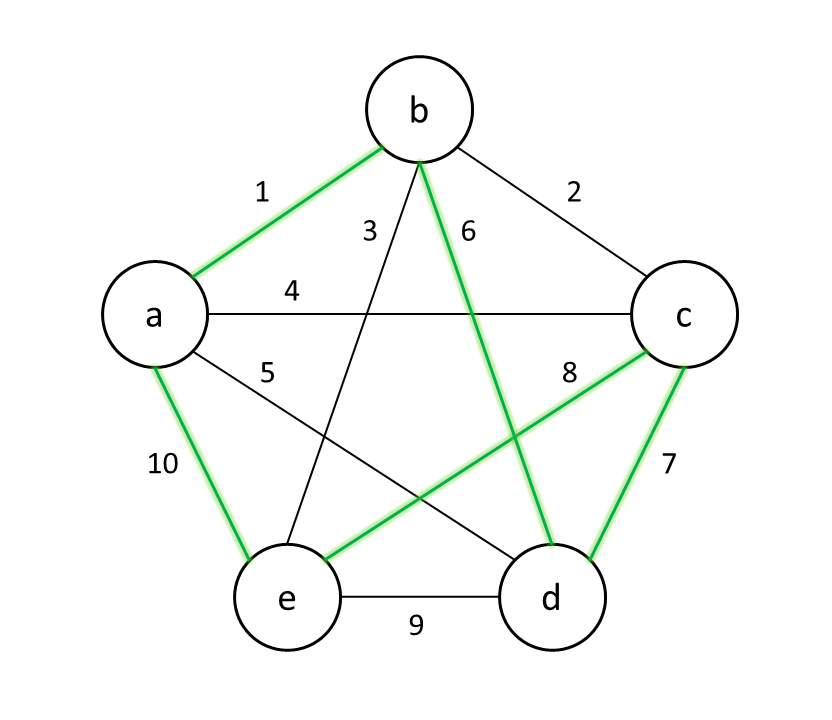

Al calcular el costo de esta solución, obtenemos un valor de 32. Podemos disminuir el costo realizando operaciones 2-change. Si intercambiamos los arcos $(b, d)$ y $(c, e)$ por los arcos $(b, c)$ y $(d, e)$, obtendremos la siguiente ruta:

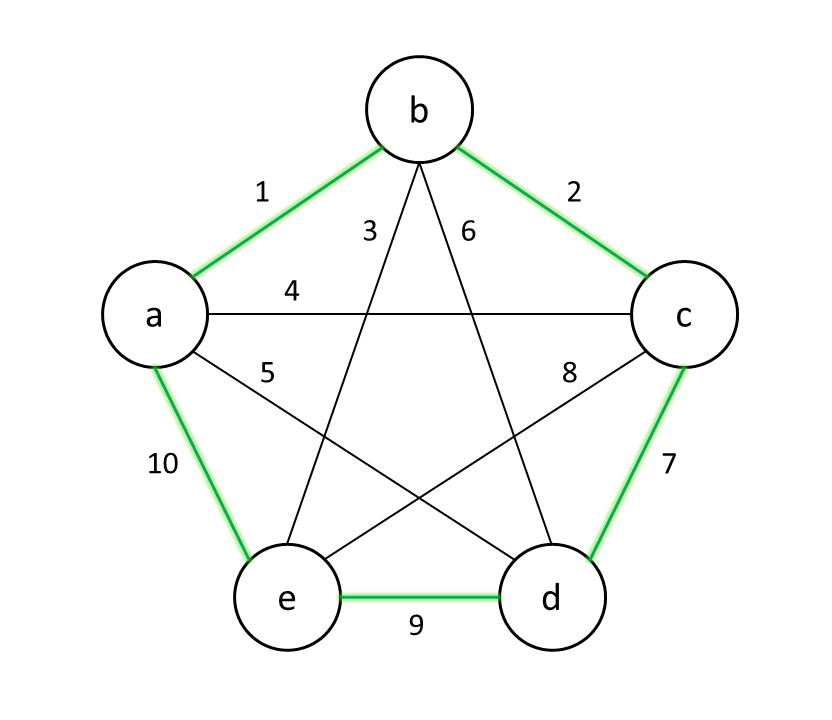

Al calcular el costo de la ruta anterior, obtenemos un valor de 29, mejorando así la solución inicial. Podemos aplicar una nueva operación 2-change, intercambiando los arcos $(a, b)$ y $(d, e)$ por los arcos $(a, d)$ y $(b, e)$:

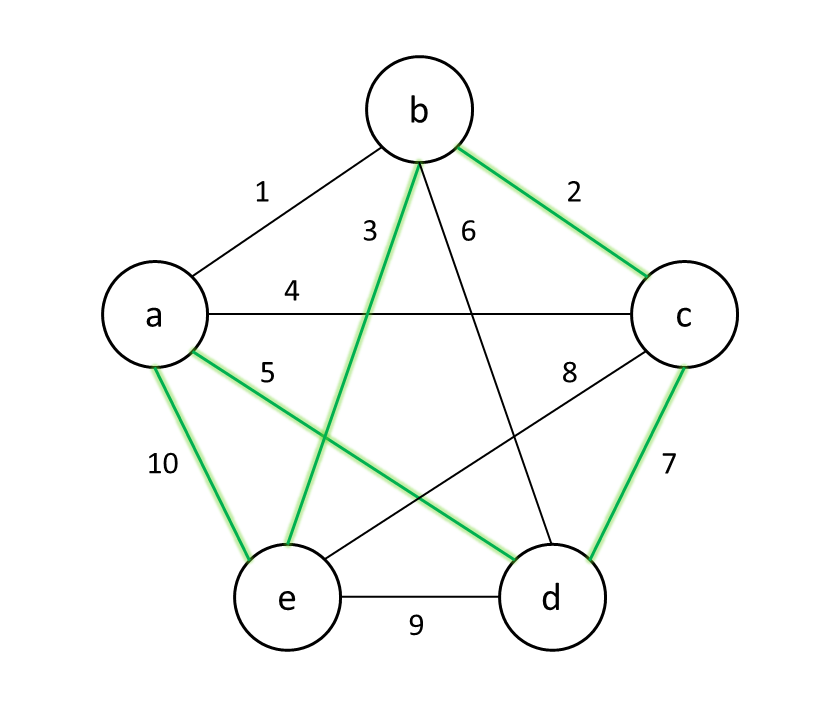

Esta última solución tiene un costo de 27. Si seguimos realizando operaciones 2-change notaremos que no es posible seguir reduciendo el costo, por lo tanto, nos quedamos con esta solución.

## Greedy

Consideremos el mismo grafo del ejemplo anterior. Comenzaremos el tour desde un nodo arbitrario $a$:

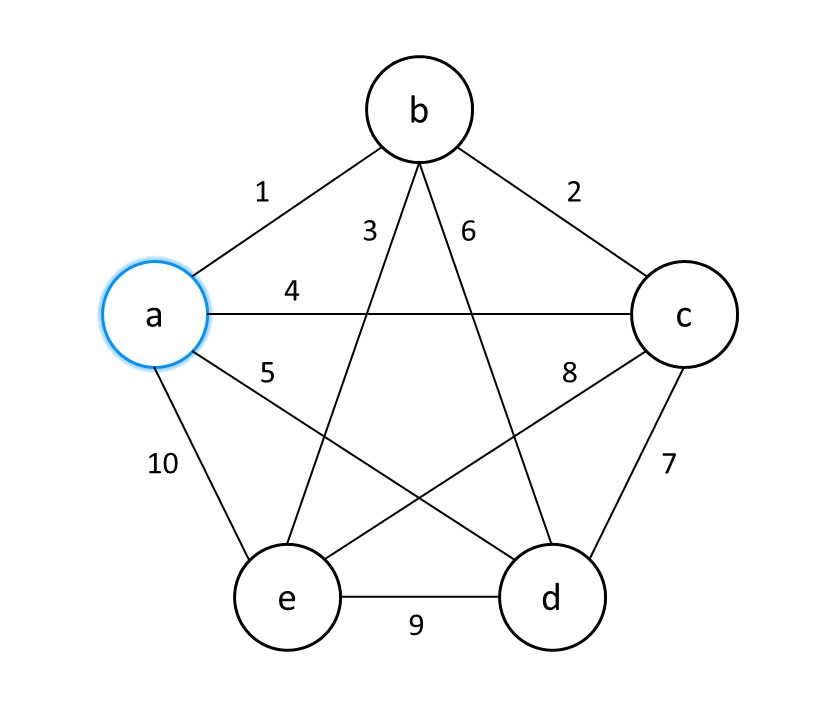

Luego, debemos avanzar al nodo no visitado más cercano al vértice $a$, en este caso $b$, cuya distancia es 1.

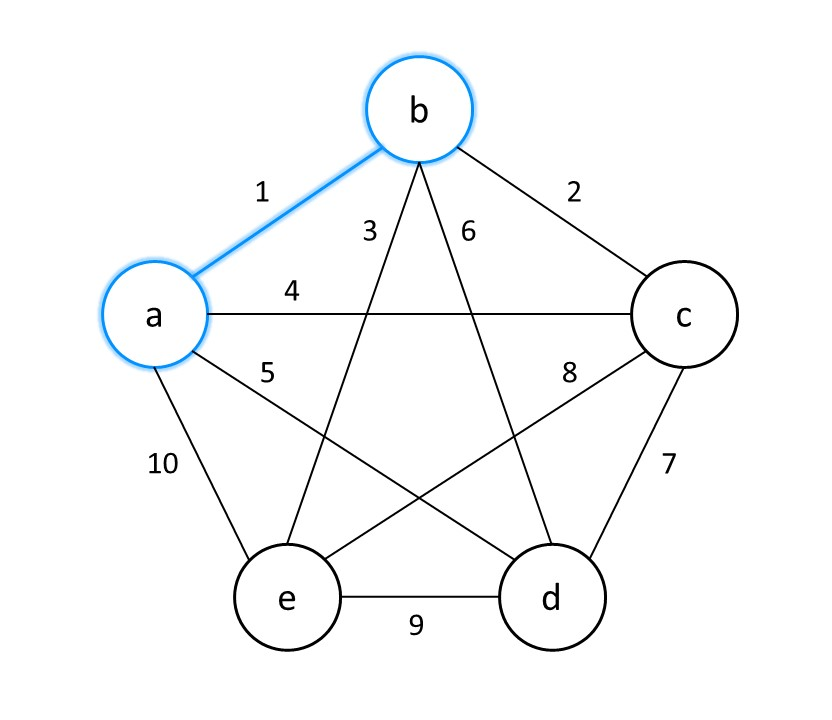

Desde el nodo $b$, el nodo no visitado más cercano es $c$. Avanzamos a este nodo:

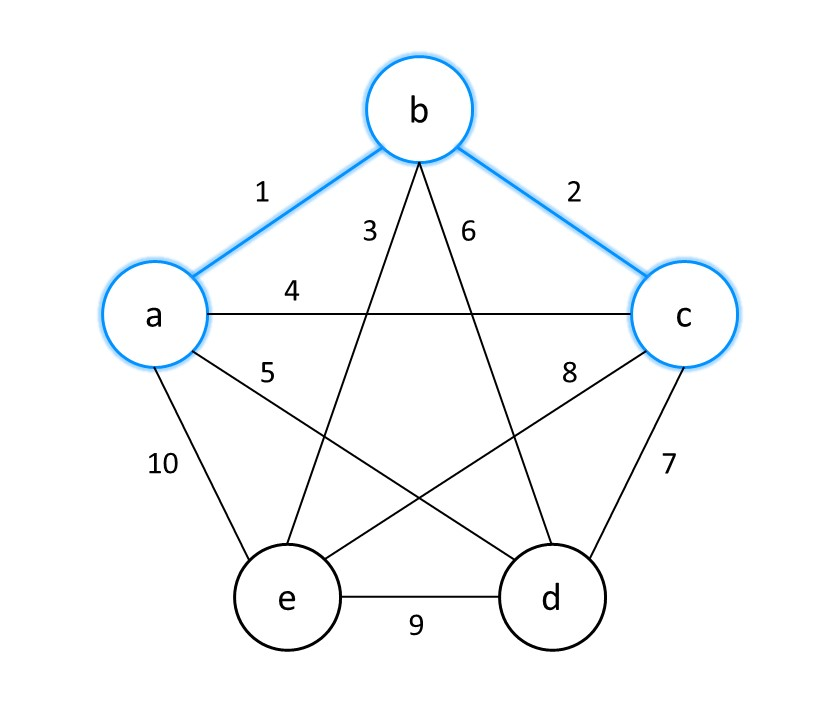

Repetimos el mismo procedimiento con los nodos restantes:

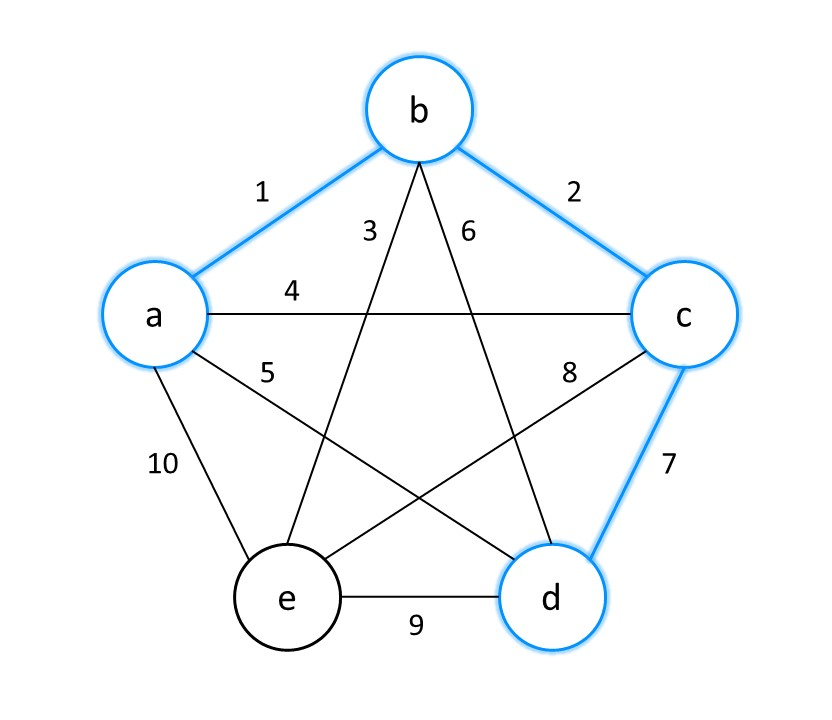

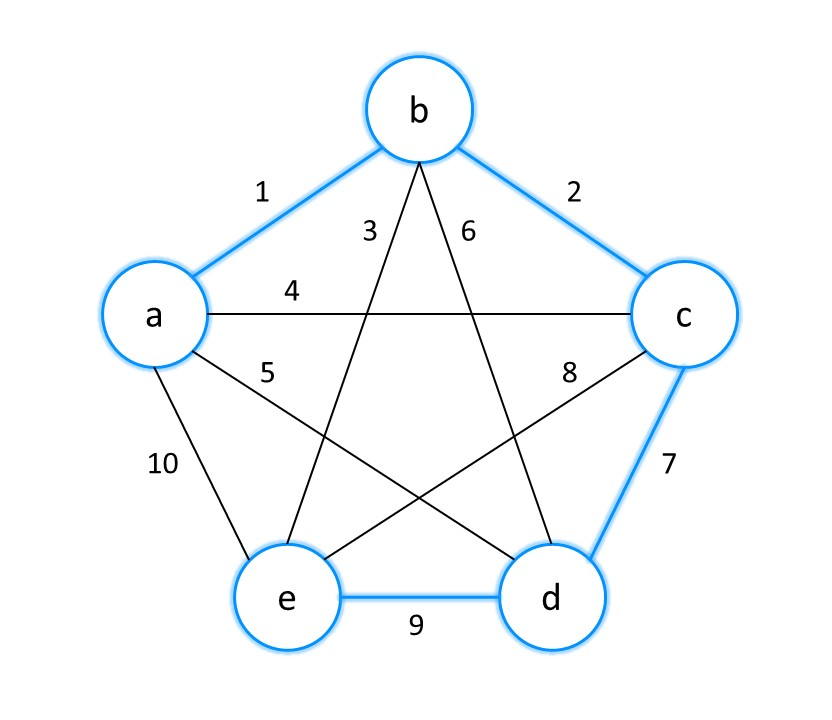

Por último, volvemos a visitar el vértice inicial $a$:

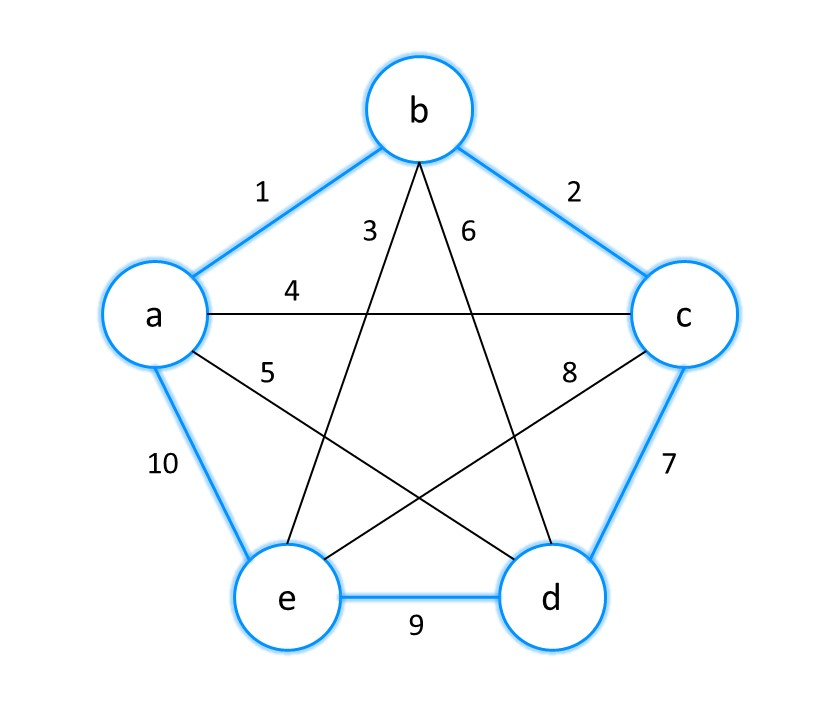

Finalmente, obtenemos un tour con un coste de 29.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada paso de ambos algoritmos:

### Búsqueda local

In [8]:
graph = generate_tsp_instance(10)
path, cost = tsp_local_search(graph, True)

Solución inicial: [2, 0, 9, 4, 8, 7, 6, 1, 3, 5, 2]
Costo inicial: 1077.8840058979208

Intercambiando arcos (2, 0) y (9, 4) por (2, 9) y (0, 4)
Solución actual: [2, 9, 0, 4, 8, 7, 6, 1, 3, 5, 2]
Decrecimiento: 194.2428975074472
Costo actual: 883.6411083904736

Intercambiando arcos (9, 0) y (6, 1) por (9, 6) y (0, 1)
Solución actual: [2, 9, 6, 7, 8, 4, 0, 1, 3, 5, 2]
Decrecimiento: 87.52268726467011
Costo actual: 796.1184211258035

Intercambiando arcos (7, 8) y (1, 3) por (7, 1) y (8, 3)
Solución actual: [2, 9, 6, 7, 1, 0, 4, 8, 3, 5, 2]
Decrecimiento: 59.227611849654664
Costo actual: 736.8908092761488

Intercambiando arcos (0, 4) y (8, 3) por (0, 8) y (4, 3)
Solución actual: [2, 9, 6, 7, 1, 0, 8, 4, 3, 5, 2]
Decrecimiento: 112.25880167728141
Costo actual: 624.6320075988674

Intercambiando arcos (2, 9) y (6, 7) por (2, 6) y (9, 7)
Solución actual: [2, 6, 9, 7, 1, 0, 8, 4, 3, 5, 2]
Decrecimiento: 50.384941029610815
Costo actual: 574.2470665692566

Intercambiando arcos (1, 0) y (8, 4) por

### Greedy

In [9]:
graph = generate_tsp_instance(5)
path, cost = tsp_greedy(graph, True)

Comenzando tour desde el nodo 0
Camino actual: [0]

Distancia de 0 a 1 = 123.30035787228906
Distancia de 0 a 2 = 47.911972199295825
Distancia de 0 a 3 = 131.7421860044777
Distancia de 0 a 4 = 129.8613574046857

Eligiendo 2 como el nodo más cercano
Marcando 2 como visitado
Camino actual: [0, 2]

Distancia de 2 a 1 = 170.18002954787383
Distancia de 2 a 3 = 162.62869307568408
Distancia de 2 a 4 = 176.61953191865484

Eligiendo 3 como el nodo más cercano
Marcando 3 como visitado
Camino actual: [0, 2, 3]

Distancia de 3 a 1 = 94.62140814385612
Distancia de 3 a 4 = 95.252151936936

Eligiendo 1 como el nodo más cercano
Marcando 1 como visitado
Camino actual: [0, 2, 3, 1]

Distancia de 1 a 4 = 6.740403729137502

Eligiendo 4 como el nodo más cercano
Marcando 4 como visitado
Camino actual: [0, 2, 3, 1, 4]

Volviendo al nodo de origen 0
Solución final: [0, 2, 3, 1, 4, 0]
Costo final: 441.7638345526592


# 3. Tiempo de ejecución

### **Teorema 1: Tiempo de ejecución del algoritmo 2-OPT**

*Cada movimiento o iteración del algoritmo de **búsqueda local** (2-OPT) tiene un un tiempo de ejecución $O(n^2)$*

## Prueba del Teorema

El **movimiento local** del algoritmo se define como el intercambio entre dos pares de arcos mediante la operación 2-change. Para encontrar cuál es el movimiento que disminuye más el costo del tour, es necesario verificar cada intercambio posible entre los arcos del grafo.

Cada arco $(v_{i}, v_{i+1})$ con $i = 0 \dots n-3$, se puede intercambiar con el arco $(v_{j}, v_{j+1})$ con $j = i+2 \dots n-2$, lo cual resulta en $O(n^2)$ permutaciones posibles. Una vez encontrado el intercambio que minimiza el costo del tour, se reacomodan los vértices en el arreglo en un tiempo $O(n)$.

Por lo tanto, el tiempo de ejecución de cada movimiento u operación 2-change es $O(n^2)$. $\Box$

# 4. Experimentos

## 4.1 Comparación Greedy vs Búsqueda local

El siguiente experimento compara el costo del tour obtenido por ambos algoritmos, para grafos generados de forma aleatoria con $n = [5, 100]$

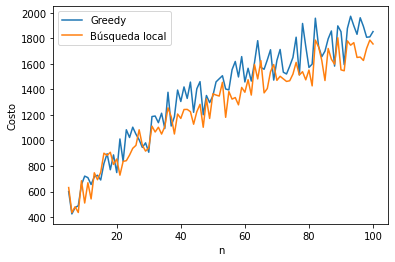

In [11]:
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[]

for n in range(5,101):
  graph = generate_tsp_instance(n)
  cost_greedy = tsp_greedy(graph)[1] 
  cost_2opt = tsp_local_search(graph)[1]

  x.append(n)
  y1.append(cost_greedy)
  y2.append(cost_2opt)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Greedy", "Búsqueda local"])

plt.xlabel('n')
plt.ylabel('Costo')
plt.show()

### Análisis de resultados

Podemos observar que, en general, el algoritmo de búsqueda local entrega soluciones más óptimas que el algoritmo greedy. Esto se debe a que el algoritmo de búsqueda local es capaz de mejorar la solución inicial después de haber sido generada. El algoritmo greedy elige el camino más óptimo de forma local, que no siempre corresponderá a la solución óptima global.

## 4.2 Algoritmo de búsqueda local con solución inicial modificada

El siguiente experimento muestra lo que ocurre con los resultados del algoritmo de búsqueda local al utilizar como solución inicial el tour retornado por el algoritmo greedy.

In [12]:
def modified_tsp_local_search(G, verbose=False):

  # Calcula el costo del tour actual
  def calculate_cost():
    cost = 0
    for i in range(n):
      cost += G[path[i]][path[i+1]]
    return cost

  n = len(G) # Cantidad de vértices

  # Generamos una solución a partir del algoritmo greedy
  path = tsp_greedy(G)[0]

  while True:
    max_change = 0 # Decrecimiento máximo
    max_i = 0
    max_j = 0

    for i in range(n-2):
      for j in range(i+2, n-1):
        current = G[path[i]][path[i+1]] + G[path[j]][path[j+1]] # Costo actual
        new = G[path[i]][path[j]] + G[path[i+1]][path[j+1]] # Costo nuevo

        change = current - new # Calculamos el decrecimiento del costo

        if change > max_change:
          max_change = change # Actualizamos el decrecimiento máximo
          max_i = i # Guardamos los vértices para realizar el intercambio
          max_j = j
          
    # Dejamos de iterar cuando la solución no pueda mejorarse
    if max_change == 0: break

    # Realizamos el intercambio de vértices
    path[max_i+1:max_j+1] = path[max_i+1:max_j+1][::-1]

  cost = calculate_cost() # Calculamos el costo del tour obtenido

  return path, cost

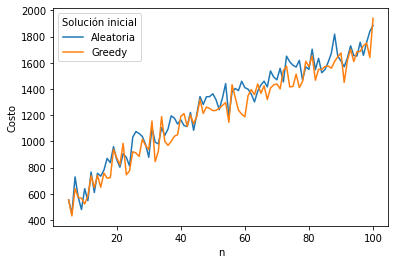

In [13]:
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[]

for n in range(5,101):
  graph = generate_tsp_instance(n)
  cost_2opt = tsp_local_search(graph)[1] 
  cost_modified_2opt = modified_tsp_local_search(graph)[1]

  x.append(n)
  y1.append(cost_2opt)
  y2.append(cost_modified_2opt)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Aleatoria", "Greedy"], title="Solución inicial")

plt.xlabel('n')
plt.ylabel('Costo')
plt.show()

### Análisis de resultados

Como podemos observar, no existe un cambio sustancial en cuanto al resultado obtenido por ambas implementaciones. Incluso podemos notar que, en algunos casos, la solución inicial aleatoria conlleva a una mejor solución final, mientras que la solución greedy proporciona un costo menos óptimo. De todas formas, es seguro que al utilizar la solución inicial retornada por el algoritmo greedy, nunca obtendremos un costo mayor al del algoritmo greedy original. Esto se debe a que el algoritmo de búsqueda local siempre intentará mejorar la solución inicial, retornando un tour con un costo igual o menor al generado inicialmente.